In [1]:
import pandas as pd

#数据加载
df_train = pd.read_csv('./cs-training.csv')
print(df_train)



        Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
0                1                 1                              0.766127   
1                2                 0                              0.957151   
2                3                 0                              0.658180   
3                4                 0                              0.233810   
4                5                 0                              0.907239   
...            ...               ...                                   ...   
149995      149996                 0                              0.040674   
149996      149997                 0                              0.299745   
149997      149998                 0                              0.246044   
149998      149999                 0                              0.000000   
149999      150000                 0                              0.850283   

        age  NumberOfTime30-59DaysPastDueNotWorse    DebtRatio 

In [2]:
#去掉第一列无效列
df_train = df_train.iloc[:,1:]
df_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [3]:
#step1 数据探索
#对SeriousDlqin2yrs 违约率进行可视化
import seaborn as sns

sns.countplot(x='SeriousDlqin2yrs',data=df_train)

D:\python\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#违约比例
df_train.SeriousDlqin2yrs.sum()/len(df_train)

0.06684

In [5]:
#查看缺失值
df_train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [6]:
#个别字段详情查看,及直方图分布
df_train.RevolvingUtilizationOfUnsecuredLines.describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

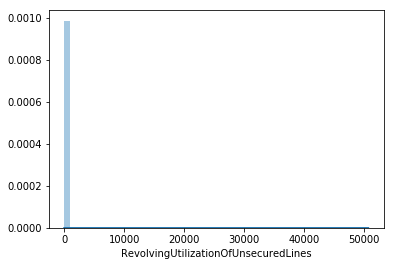

In [7]:
sns.distplot(df_train.RevolvingUtilizationOfUnsecuredLines)

In [8]:
#数据填充
df_train.mean()

SeriousDlqin2yrs                           0.066840
RevolvingUtilizationOfUnsecuredLines       6.048438
age                                       52.295207
NumberOfTime30-59DaysPastDueNotWorse       0.421033
DebtRatio                                353.005076
MonthlyIncome                           6670.221237
NumberOfOpenCreditLinesAndLoans            8.452760
NumberOfTimes90DaysLate                    0.265973
NumberRealEstateLoansOrLines               1.018240
NumberOfTime60-89DaysPastDueNotWorse       0.240387
NumberOfDependents                         0.757222
dtype: float64

In [9]:
#中位数，可见与均值相比，一些字段的中位数与平均数差距较大，说明有极大数值拉扯平均数，这里选择用中位数进行填充。
df_train.median()

SeriousDlqin2yrs                           0.000000
RevolvingUtilizationOfUnsecuredLines       0.154181
age                                       52.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.366508
MonthlyIncome                           5400.000000
NumberOfOpenCreditLinesAndLoans            8.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               1.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
dtype: float64

In [10]:
df_train = df_train.fillna(df_train.median())
df_train.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [11]:
#数据分箱
#对于age字段，分成6段 [-math.inf, 25, 40, 50, 60, 70, math.inf]
#对于NumberOfDependents（家属人数）字段，分成6段 [-math.inf,2,4,6,8,10,math.inf]

#对age字段进行分箱
import math
age_bins=[-math.inf, 25, 40, 50, 60, 70, math.inf]
df_train['bin_age'] = pd.cut(df_train.age,bins=age_bins)
df_train.bin_age

0         (40.0, 50.0]
1         (25.0, 40.0]
2         (25.0, 40.0]
3         (25.0, 40.0]
4         (40.0, 50.0]
              ...     
149995     (70.0, inf]
149996    (40.0, 50.0]
149997    (50.0, 60.0]
149998    (25.0, 40.0]
149999    (60.0, 70.0]
Name: bin_age, Length: 150000, dtype: category
Categories (6, interval[float64]): [(-inf, 25.0] < (25.0, 40.0] < (40.0, 50.0] < (50.0, 60.0] < (60.0, 70.0] < (70.0, inf]]

In [12]:
#对于NumberOfDependents（家属人数）字段分箱，
dependent_bins = [-math.inf,2,4,6,8,10,math.inf]
df_train['bin_NumberOfDependents'] = pd.cut(df_train.NumberOfDependents,bins=dependent_bins)
df_train[['bin_NumberOfDependents','NumberOfDependents']]

,bin_NumberOfDependents,NumberOfDependents
0,"(-inf, 2.0]",2.0
1,"(-inf, 2.0]",1.0
2,"(-inf, 2.0]",0.0
3,"(-inf, 2.0]",0.0
4,"(-inf, 2.0]",0.0
...,...,...
149995,"(-inf, 2.0]",0.0
149996,"(-inf, 2.0]",2.0
149997,"(-inf, 2.0]",0.0
149998,"(-inf, 2.0]",0.0


In [13]:
#对于3种逾期次数，即NumberOfTime30-59DaysPastDueNotWorse，NumberOfTime60-89DaysPastDueNotWorse，NumberOfTimes90DaysLate，分成10段  [-math.inf,1,2,3,4,5,6,7,8,9,math.inf]
dpd_bins =  [-math.inf,1,2,3,4,5,6,7,8,9,math.inf]
df_train['bin_NumberOfTime30-59DaysPastDueNotWorse'] = pd.cut(df_train['NumberOfTime30-59DaysPastDueNotWorse'],bins=dpd_bins)
df_train['bin_NumberOfTime60-89DaysPastDueNotWorse'] = pd.cut(df_train['NumberOfTime60-89DaysPastDueNotWorse'],bins=dpd_bins)
df_train['bin_NumberOfTimes90DaysLate'] = pd.cut(df_train['NumberOfTimes90DaysLate'],bins=dpd_bins)

df_train[['bin_NumberOfTime30-59DaysPastDueNotWorse','bin_NumberOfTime60-89DaysPastDueNotWorse','bin_NumberOfTimes90DaysLate']]


,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate
0,"(1.0, 2.0]","(-inf, 1.0]","(-inf, 1.0]"
1,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
2,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
3,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
4,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
...,...,...,...
149995,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149996,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149997,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149998,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"


In [14]:
#对于其余字段，即RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines 分成5段
df_train['bin_RevolvingUtilizationOfUnsecuredLines'] = pd.qcut(df_train['RevolvingUtilizationOfUnsecuredLines'],q=5,duplicates='drop')
df_train['bin_DebtRatio'] = pd.qcut(df_train['DebtRatio'],q=5,duplicates='drop')
df_train['bin_MonthlyIncome'] = pd.qcut(df_train['MonthlyIncome'],q=5,duplicates='drop')
df_train['bin_NumberOfOpenCreditLinesAndLoans'] = pd.qcut(df_train['NumberOfOpenCreditLinesAndLoans'],q=5,duplicates='drop')
loan_bins = [-math.inf,0,1,2,3,math.inf]
df_train['bin_NumberRealEstateLoansOrLines'] = pd.cut(df_train['NumberRealEstateLoansOrLines'],bins=loan_bins)

df_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,bin_age,bin_NumberOfDependents,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate,bin_RevolvingUtilizationOfUnsecuredLines,bin_DebtRatio,bin_MonthlyIncome,bin_NumberOfOpenCreditLinesAndLoans,bin_NumberRealEstateLoansOrLines
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,"(40.0, 50.0]","(-inf, 2.0]","(1.0, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(0.468, 4.0]","(8250.0, 3008750.0]","(12.0, 58.0]","(3.0, inf]"
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-inf, 0.0]"
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-inf, 0.0]"
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(-0.001, 0.134]","(-0.001, 3400.0]","(4.0, 6.0]","(-inf, 0.0]"
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(8250.0, 3008750.0]","(6.0, 9.0]","(0.0, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,...,"(70.0, inf]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0192, 0.0832]","(0.134, 0.287]","(-0.001, 3400.0]","(-0.001, 4.0]","(0.0, 1.0]"
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,...,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(0.468, 4.0]","(5400.0, 8250.0]","(-0.001, 4.0]","(0.0, 1.0]"
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,...,"(50.0, 60.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(4.0, 329664.0]","(3400.0, 5400.0]","(12.0, 58.0]","(0.0, 1.0]"
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(-0.001, 0.0192]","(-0.001, 0.134]","(5400.0, 8250.0]","(-0.001, 4.0]","(-inf, 0.0]"


In [15]:
df_train['bin_NumberRealEstateLoansOrLines'].value_counts()

(-inf, 0.0]    56188
(0.0, 1.0]     52338
(1.0, 2.0]     31522
(2.0, 3.0]      6300
(3.0, inf]      3652
Name: bin_NumberRealEstateLoansOrLines, dtype: int64

In [16]:
#统计分箱字段
bin_cols = [c for c in df_train.columns.values if c.startswith('bin_')]
bin_cols

['bin_age',
 'bin_NumberOfDependents',
 'bin_NumberOfTime30-59DaysPastDueNotWorse',
 'bin_NumberOfTime60-89DaysPastDueNotWorse',
 'bin_NumberOfTimes90DaysLate',
 'bin_RevolvingUtilizationOfUnsecuredLines',
 'bin_DebtRatio',
 'bin_MonthlyIncome',
 'bin_NumberOfOpenCreditLinesAndLoans',
 'bin_NumberRealEstateLoansOrLines']

In [17]:
# 计算IV,衡量变量的预测能力
import numpy as np
def cal_IV(df,feature,target):
    lst = []
    cols = ['Variable','Value','All','Bad']
    #对feature中的每个分箱取值进行遍历
    #unique代表不同值，nunique 代表 number of unique :不同值得个数
    for i in range(df[feature].nunique()):
        #得到第i个分箱取值
        val = list(df[feature].unique())[i]
        #统计feature,feature_value ,这个value的个数，及这个value导致value=1的个数
        lst.append([feature,val,df[df[feature]==val].count()[feature],
                    df[(df[feature]==val)&(df[target]==1)].count()[feature]])
    data = pd.DataFrame(lst,columns=cols)
    data = data[data.Bad > 0]
    data['Share'] = data.All/data.All.sum() #这个value所占比例
    data['Bad Rate'] = data.Bad / data.All #这个value导致bad得情况，在该value个数得比例
    data['Margin Bad'] = data.Bad /data.Bad.sum()
    data['Margin Good'] = (data.All - data.Bad) / (data.All.sum() - data.Bad.sum())
    data['woe'] = np.log(data['Margin Bad']/data['Margin Good'])
    data['iv'] = (data.woe * (data['Margin Bad'] - data['Margin Good'])).sum()
    data = data.sort_values(by=['Variable','Value'])
#     print(data)
    return data.iv.values[0]

cal_IV(df_train,'bin_age','SeriousDlqin2yrs')

0.24041120302785982

In [18]:
#计算每个字段的iv值,#只选择iv值 > 0.1 的，入选的字段有5个
feature_cols = []
for f in bin_cols:
    if cal_IV(df_train,f,'SeriousDlqin2yrs') > 0.1:
        feature_cols.append(f)
        print(f,cal_IV(df_train,f,'SeriousDlqin2yrs'))
print(feature_cols)

bin_age 0.24041120302785982
bin_NumberOfTime30-59DaysPastDueNotWorse 0.492444774570198
bin_NumberOfTime60-89DaysPastDueNotWorse 0.2665587583516951
bin_NumberOfTimes90DaysLate 0.49160685733515563
bin_RevolvingUtilizationOfUnsecuredLines 1.0596188771423887
['bin_age', 'bin_NumberOfTime30-59DaysPastDueNotWorse', 'bin_NumberOfTime60-89DaysPastDueNotWorse', 'bin_NumberOfTimes90DaysLate', 'bin_RevolvingUtilizationOfUnsecuredLines']


In [19]:
#计算这些特征的woe
def cal_woe(df, features, target):
    df_new = df.copy()
    for f in features:
        df_woe= df_new.groupby(f).agg({target:['sum','count']})
        df_woe.columns = list(map(''.join,df_woe.columns.values))
        df_woe = df_woe.reset_index()
        df_woe = df_woe.rename(columns = {target+'sum':'bad',target+'count':'all'})
        df_woe['good'] = df_woe['all']-df_woe['bad']
        df_woe['Margin Bad'] = df_woe.bad / df_woe.bad.sum()
        df_woe['Margin Good'] = df_woe.good / df_woe.good.sum()
        df_woe['woe'] = np.log1p(df_woe['Margin Bad'] / df_woe['Margin Good'])
        df_woe.columns = [c if c ==f else c+'_'+f for c in list(df_woe.columns.values)]
        df_new = df_new.merge(df_woe,on=f,how='left')
    return df_new


df_woe = cal_woe(df_train,bin_cols,'SeriousDlqin2yrs')

In [20]:
feature_cols = ['age', 
                'NumberOfTime30-59DaysPastDueNotWorse', 
                'NumberOfTime60-89DaysPastDueNotWorse', 
                'NumberOfTimes90DaysLate', 
                'RevolvingUtilizationOfUnsecuredLines']

In [21]:
#得到woe的规则   features,bin,woe
df_bin_to_woe=pd.DataFrame(columns=['features','bin','woe'])
for f in feature_cols:
    b='bin_'+f
    w='woe_bin_'+f
    df = df_woe[[w,b]].drop_duplicates()
    df.columns = ['woe','bin']
    df['features'] = f
    df_bin_to_woe = pd.concat([df_bin_to_woe,df])
print(df_bin_to_woe)

                                   features               bin       woe
0                                       age      (40.0, 50.0]  0.813822
1                                       age      (25.0, 40.0]  0.955231
5                                       age       (70.0, inf]  0.279404
6                                       age      (50.0, 60.0]  0.651655
15                                      age      (60.0, 70.0]  0.406848
19                                      age      (-inf, 25.0]  1.013134
0      NumberOfTime30-59DaysPastDueNotWorse        (1.0, 2.0]  1.797837
1      NumberOfTime30-59DaysPastDueNotWorse       (-inf, 1.0]  0.572521
13     NumberOfTime30-59DaysPastDueNotWorse        (2.0, 3.0]  2.151185
183    NumberOfTime30-59DaysPastDueNotWorse        (3.0, 4.0]  2.429111
191    NumberOfTime30-59DaysPastDueNotWorse        (4.0, 5.0]  2.520613
251    NumberOfTime30-59DaysPastDueNotWorse        (6.0, 7.0]  2.774776
423    NumberOfTime30-59DaysPastDueNotWorse        (9.0, inf]  2

In [56]:
woe_cols = [c for c in list(df_woe.columns.values) if 'woe' in c]
print(woe_cols)
print(feature_cols)

['woe_bin_age', 'woe_bin_NumberOfDependents', 'woe_bin_NumberOfTime30-59DaysPastDueNotWorse', 'woe_bin_NumberOfTime60-89DaysPastDueNotWorse', 'woe_bin_NumberOfTimes90DaysLate', 'woe_bin_RevolvingUtilizationOfUnsecuredLines', 'woe_bin_DebtRatio', 'woe_bin_MonthlyIncome', 'woe_bin_NumberOfOpenCreditLinesAndLoans', 'woe_bin_NumberRealEstateLoansOrLines']
['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'RevolvingUtilizationOfUnsecuredLines']


In [57]:
woe_cols = ['woe_bin_'+c for c in feature_cols]
print(woe_cols)

['woe_bin_age', 'woe_bin_NumberOfTime30-59DaysPastDueNotWorse', 'woe_bin_NumberOfTime60-89DaysPastDueNotWorse', 'woe_bin_NumberOfTimes90DaysLate', 'woe_bin_RevolvingUtilizationOfUnsecuredLines']


In [58]:
woe_cols

['woe_bin_age',
 'woe_bin_NumberOfTime30-59DaysPastDueNotWorse',
 'woe_bin_NumberOfTime60-89DaysPastDueNotWorse',
 'woe_bin_NumberOfTimes90DaysLate',
 'woe_bin_RevolvingUtilizationOfUnsecuredLines']

In [59]:
df_woe[woe_cols]

,woe_bin_age,woe_bin_NumberOfTime30-59DaysPastDueNotWorse,woe_bin_NumberOfTime60-89DaysPastDueNotWorse,woe_bin_NumberOfTimes90DaysLate,woe_bin_RevolvingUtilizationOfUnsecuredLines
0,0.813822,1.797837,0.645352,0.608707,1.495914
1,0.955231,0.572521,0.645352,0.608707,1.495914
2,0.955231,0.572521,0.645352,0.608707,0.720083
3,0.955231,0.572521,0.645352,0.608707,0.350952
4,0.813822,0.572521,0.645352,0.608707,1.495914
...,...,...,...,...,...
149995,0.279404,0.572521,0.645352,0.608707,0.211221
149996,0.813822,0.572521,0.645352,0.608707,0.720083
149997,0.651655,0.572521,0.645352,0.608707,0.350952
149998,0.955231,0.572521,0.645352,0.608707,0.243890


In [60]:
#逻辑回归
from sklearn.model_selection import train_test_split
#woe_cols = [c for c in list(df_woe[woe_cols].values) if 'woe' in c]
x_train,x_test,y_train,y_test = train_test_split(df_woe[woe_cols],df_woe['SeriousDlqin2yrs'],test_size=0.2,random_state=33)
print(x_train)

        woe_bin_age  woe_bin_NumberOfTime30-59DaysPastDueNotWorse  \
106833     0.813822                                      0.572521   
126865     0.955231                                      0.572521   
21011      0.406848                                      0.572521   
31844      0.406848                                      0.572521   
133133     0.955231                                      0.572521   
...             ...                                           ...   
34877      0.955231                                      0.572521   
147558     0.813822                                      1.797837   
75971      0.279404                                      0.572521   
131650     0.813822                                      0.572521   
104152     0.813822                                      0.572521   

        woe_bin_NumberOfTime60-89DaysPastDueNotWorse  \
106833                                      0.645352   
126865                                      0.645352   
210

In [61]:
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=33).fit(x_train,y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(roc_auc_score(y_pred,y_test))

0.9364333333333333
0.7787691092695656


In [71]:
#PDO=50 => B=72.13
#odds=1的时候，p0的分数为650 => A=650
A,B = 650,72.13
#生成评分卡模型
def generate_scorecard(model_coef,binning_df,features,B):
    cols = ['Variable','Binning','Score']
    lst = []
    #模型系数
    coef=model_coef[0]
    #print(coef)
    for i in range(len(features)):
        f=features[i]
        # print(f)
        #得到这个feature的woe规则
        df = binning_df[binning_df['features']==f]
        #print(df)
        for index,row in df.iterrows():
            score=int(round(-coef[i] * row['woe']*B))
            lst.append([f,row['bin'],score])
    data = pd.DataFrame(lst,columns=cols)
    return data

score_card = generate_scorecard(model.coef_,df_bin_to_woe,feature_cols,B)
score_card

,Variable,Binning,Score
0,age,"(40.0, 50.0]",-65
1,age,"(25.0, 40.0]",-76
2,age,"(70.0, inf]",-22
3,age,"(50.0, 60.0]",-52
4,age,"(60.0, 70.0]",-32
5,age,"(-inf, 25.0]",-81
6,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",-114
7,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",-36
8,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",-136
9,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",-153


In [74]:
#对每个字段按照分数降序排序，查看规则
sort_scorecard=score_card.groupby('Variable').apply(lambda x:x.sort_values('Score',ascending=False))
sort_scorecard

Variable  \
Variable                                                                        
NumberOfTime30-59DaysPastDueNotWorse 7   NumberOfTime30-59DaysPastDueNotWorse   
                                     6   NumberOfTime30-59DaysPastDueNotWorse   
                                     14  NumberOfTime30-59DaysPastDueNotWorse   
                                     15  NumberOfTime30-59DaysPastDueNotWorse   
                                     8   NumberOfTime30-59DaysPastDueNotWorse   
                                     9   NumberOfTime30-59DaysPastDueNotWorse   
                                     10  NumberOfTime30-59DaysPastDueNotWorse   
                                     11  NumberOfTime30-59DaysPastDueNotWorse   
                                     13  NumberOfTime30-59DaysPastDueNotWorse   
                                     12  NumberOfTime30-59DaysPastDueNotWorse   
NumberOfTime60-89DaysPastDueNotWorse 25  NumberOfTime60-89DaysPastDueNotWorse   
                                     16  NumberOfTime60-89DaysPastDueNotWorse   
                                     24  NumberOfTime60-89DaysPastDueNotWorse   
                                     17  NumberOfTime60-89DaysPastDueNotWorse   
                                     20  NumberOfTime60-89DaysPastDueNotWorse   
                                     23  NumberOfTime60-89DaysPastDueNotWorse   
                                     19  NumberOfTime60-89DaysPastDueNotWorse   
                                     18  NumberOfTime60-89DaysPastDueNotWorse   
                                     21  NumberOfTime60-89DaysPastDueNotWorse   
                                     22  NumberOfTime60-89DaysPastDueNotWorse   
NumberOfTimes90DaysLate              26               NumberOfTimes90DaysLate   
                                     28               NumberOfTimes90DaysLate   
                                     31               NumberOfTimes90DaysLate   
                                     27               NumberOfTimes90DaysLate   
                                     33               NumberOfTimes90DaysLate   
                                     29               NumberOfTimes90DaysLate   
                                     30               NumberOfTimes90DaysLate   
                                     35               NumberOfTimes90DaysLate   
                                     32               NumberOfTimes90DaysLate   
                                     34               NumberOfTimes90DaysLate   
RevolvingUtilizationOfUnsecuredLines 40  RevolvingUtilizationOfUnsecuredLines   
                                     39  RevolvingUtilizationOfUnsecuredLines   
                                     38  RevolvingUtilizationOfUnsecuredLines   
                                     37  RevolvingUtilizationOfUnsecuredLines   
                                     36  RevolvingUtilizationOfUnsecuredLines   
age                                  2                                    age   
                                     4                                    age   
                                     3                                    age   
                                     0                                    age   
                                     1                                    age   
                                     5                                    age   

                                                  Binning  Score  
Variable                                                          
NumberOfTime30-59DaysPastDueNotWorse 7        (-inf, 1.0]    -36  
                                     6         (1.0, 2.0]   -114  
                                     14        (7.0, 8.0]   -128  
                                     15        (8.0, 9.0]   -131  
                                     8         (2.0, 3.0]   -136  
                                     9         (3.0, 4.0]   -153  
                                     10        (4

In [85]:
def str_to_int(s):
    if s =='-inf':
        return -9999999
    if s =='inf':
        return 9999999
    return float(s)



#将value映射到bin
def map_value_to_bin(feature_value,feature_to_bin):
    for index,row in feature_to_bin.iterrows():
        bins = str(row['Binning'])
        left_open = bins[0]=='('
        right_open = bins[-1]==')' #如果右侧为] ,则right_open=0
        binnings=bins[1:-1].split(',')
        in_range = True
        #检查左括号
        if left_open:
            if feature_value <= str_to_int(binnings[0]):
                in_range = False
        else:
            if feature_value < str_to_int(binnings[0]):
                in_range = False

        #检查右括号
        if right_open:
            if feature_value >= str_to_int(binnings[1]):
                in_range = False
        else:
            if feature_value > str_to_int(binnings[1]):
                in_range = False
        if in_range:
            return row['Binning']
    return null




#通过评分卡规则转换为分数
def map_to_score(df,score_card):
    scored_columns=list(score_card['Variable'].unique())
    # print(scored_columns)
    score=0
    for col in scored_columns:
        feature_to_bin=score_card[score_card['Variable']==col]
        feature_value = df[col]
        # 将value映射到bin
        selected_bin=map_value_to_bin(feature_value,feature_to_bin)
        selected_record_in_scorecard=feature_to_bin[feature_to_bin['Binning']==selected_bin]
        score = score+selected_record_in_scorecard['Score'].iloc[0]
    return score

#使用评分卡模型计算分数
def calculate_score_with_card(df,score_card,A):
    df['Score'] = df.apply(map_to_score,args=(score_card,),axis=1)
    df['Score'] +=A
    df['Score'] = df['Score'].astype(int)
    return df

In [86]:
#随机选择good的5个人
good_sample = df_train[df_train['SeriousDlqin2yrs']==0].sample(5)
good_sample[feature_cols]

,age,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,RevolvingUtilizationOfUnsecuredLines
86368,44,0,0,0,0.315912
98273,52,0,0,0,0.326951
110360,79,0,0,0,0.059012
140559,69,0,0,0,0.166485
130517,36,0,0,0,0.102266


In [87]:
#应用评分卡计算分数
calculate_score_with_card(good_sample,score_card,A)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,bin_NumberOfDependents,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate,bin_RevolvingUtilizationOfUnsecuredLines,bin_DebtRatio,bin_MonthlyIncome,bin_NumberOfOpenCreditLinesAndLoans,bin_NumberRealEstateLoansOrLines,Score
86368,0,0.315912,44,0,0.148515,1817.0,5,0,0,0,...,"(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(0.134, 0.287]","(-0.001, 3400.0]","(4.0, 6.0]","(-inf, 0.0]",421
98273,0,0.326951,52,0,0.640833,4515.0,11,0,2,0,...,"(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(0.468, 4.0]","(3400.0, 5400.0]","(9.0, 12.0]","(1.0, 2.0]",434
110360,0,0.059012,79,0,0.028657,3000.0,6,0,0,0,...,"(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0192, 0.0832]","(-0.001, 0.134]","(-0.001, 3400.0]","(4.0, 6.0]","(-inf, 0.0]",517
140559,0,0.166485,69,0,0.563822,4300.0,12,0,2,0,...,"(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(0.468, 4.0]","(3400.0, 5400.0]","(9.0, 12.0]","(1.0, 2.0]",493
130517,0,0.102266,36,0,0.499182,5500.0,10,0,2,0,...,"(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(0.468, 4.0]","(5400.0, 8250.0]","(9.0, 12.0]","(1.0, 2.0]",449


In [91]:
#随机选择bad的5个人
bad_sample = df_train[df_train['SeriousDlqin2yrs']==1].sample(5)
bad_sample=bad_sample[feature_cols]
#应用评分卡计算分数
calculate_score_with_card(bad_sample,score_card,A)

,age,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,RevolvingUtilizationOfUnsecuredLines,Score
48610,34,0,0,0,0.965545,330
111784,26,2,0,0,0.696521,332
59394,37,0,1,2,0.553778,300
96991,40,0,0,1,1.032424,330
89349,38,2,0,0,1.005241,252


# 评分卡模型的规则说明

其实本质上来说，评分卡模型有最重要的两点
首先将特征进行woe编码，其优点为
  1)将非线性的特征转换为线性的值，这对于我们之后使用LR是很重要的一点。
  2)woe编码将特征进行分段，这对于一些异常数据有很好的鲁棒性，不会因为一些异常点进行LR时会产生很大的波动甚至是欠拟合。
  3)根据计算woe可以计算出iv值，可以利用这个进行特征变量的筛选，是很重要。 
其次评分卡模型的一大特点是利用odds，非线性到线性的的转换，在计算分数的时候可以看作分数score就是odds的线性函数。𝑆𝑐𝑜𝑟𝑒=𝐴 −𝐵 ∗ ln⁡(𝑂𝑑𝑑𝑠)

In [ ]:
step1 数据探索性分析
step2 EDA/数据预处理
step3 计算特征的IV值，进行特征筛选，取IV>0.1
    1)margin_bad_rate = bad/total_bads
      margin_good_rate = good/total_goods
      WOE=ln(margin_bad_rate/margin_good_rate)
      IV=(bad/total_bads - good/total_goods)*WOE
    2)加权相加计算IV值。
step4 计算特征的每个分段的woe值。
step5 使用逻辑回归进行建模
      训练集、测试集切分
      计算LR的准确率
step6 评分卡模型转换，计算出A B值
        根据𝑆𝑐𝑜𝑟𝑒=𝐴 −𝐵 ∗ ln⁡(𝑂𝑑𝑑𝑠)     
      计算出生成评分卡。



